# Heterocedasticidade 



In [215]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import statsmodels.api as sm

Ao realizar uma regressão linear, principalmente com objetivo preditivo, o bom cientista de dados deve se atentar à distribuição dos resíduos, pois estes podem fornecer informações importantes para a validade das inferências e para detectar a possível omissão de variáveis no modelo. Para que as inferências sejam válidas, devem ser atendidas as seguintes condições:

- Os resíduos devem ser normalmente distribuídos;
- Os resíduos devem possuir variância constante (homocedasticidade);
- Os resíduos devem ser independentes.

**De acordo com a definição formal, heterocedasticidade é a não constância da variância dos resíduos ao longo do intervalo de valores previstos. De maneira simplificada, podemos dizer que os erros não são constantes, sendo maiores em certas áreas do intervalo de X.**

Para facilitar o estudo e a visualização da heterocedasticidade, vamos gerar um gráfico utilizando as bibliotecas `numpy` e `matplotlib`. A equação da reta nos mostra como o valor de Y varia em função de X, conforme a equação abaixo:

<p align="center">
  <strong>
    Y = b0 + b1X
  </strong>
</p>

- **b0** - Intercepto da regressão;
- **b1** - Coeficiente angular da regressão.

Para simular a heterocedasticidade, adicionaremos uma variável de ruído que aumenta proporcionalmente com X, modificando assim a equação.

O ruído é representado por uma perturbação aleatória que se intensifica à medida que X aumenta. Essa característica é típica de dados heterocedásticos, onde a variabilidade dos erros não é constante ao longo das observações. Utilizamos o método `randn` da biblioteca `numpy` para gerar valores pseudoaleatórios que introduzem o ruído no modelo, garantindo que um gráfico diferente seja gerado a cada execução do código.


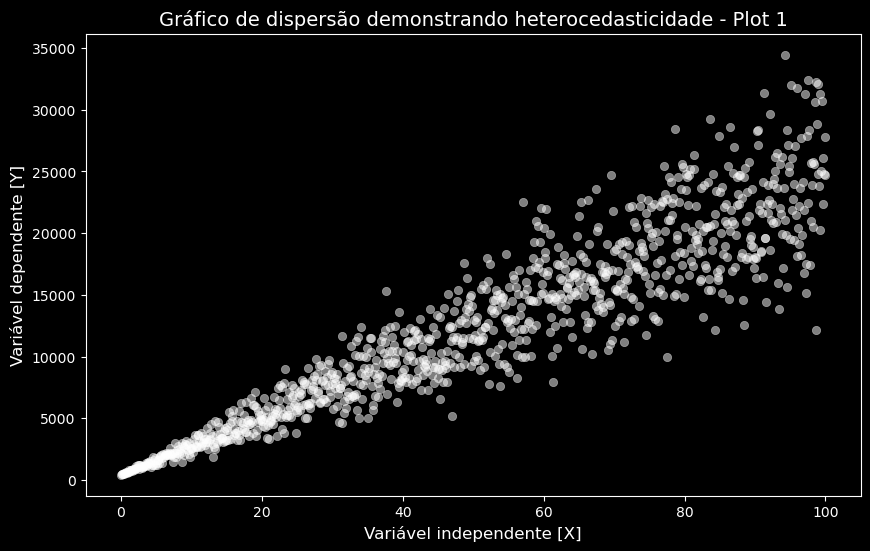

In [211]:
n = 1000                                                         # Quantidade de registros
b0 = np.random.randint(low=250, high=500)                        # Intercepto da regressão
b1 = np.random.randint(low=150, high=250)                        # Coeficiente angular da regressão
heterocedasticidade  = np.random.randint(low=30, high=50)        # Fator de escala para a heterocedasticidade do ruído

# Variável independente X
X = np.linspace(0, 100, n)

# Variável dependente y com heterocedasticidade
y = b0 + b1 * X + np.random.randn(n) * X * heterocedasticidade  # Ruído aumenta proporcionalmente com X

# Criar um DataFrame
df = pd.DataFrame({'X': X, 'Y': y})
 
# Plot dos dados
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='X', y='Y', data=df, color='white', alpha=0.5)  
plt.title('Gráfico de dispersão demonstrando heterocedasticidade - Plot 1', color='white', size=14) 
plt.xlabel('Variável independente [X]', color='white', size=12)  
plt.ylabel('Variável dependente [Y]', color='white', size=12)  
plt.tick_params(axis='both', colors='white')  
plt.show()

Ao olhar para o **Plot 1**, vemos que, à medida que avançamos em X, nossos valores previstos (Y) ficam cada vez mais *"espalhados"*. Para entender melhor, vamos treinar um modelo de regressão linear utilizando a biblioteca `scikit-learn` para podermos, assim, analisar os resíduos.


## Regressão linear

Intercepto: 339.6798378726453
Coeficiente da regressão linear: [240.29619292]


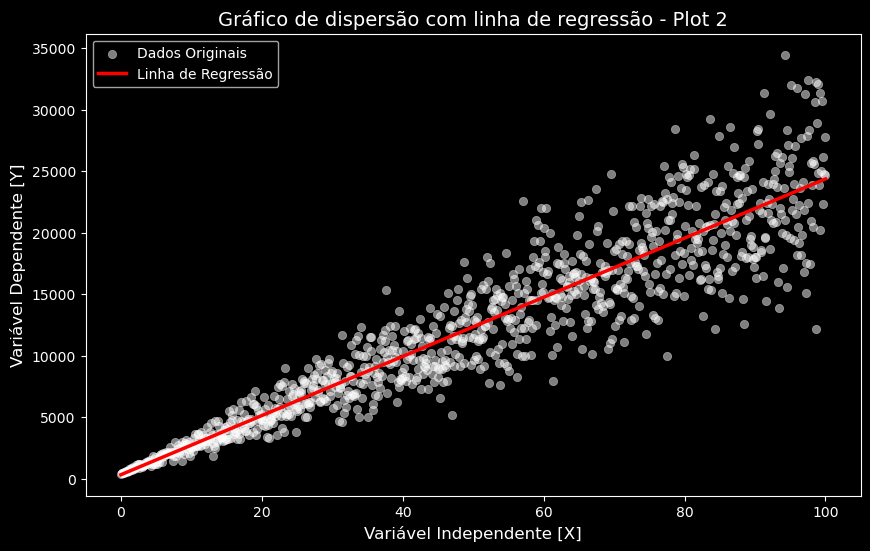

In [212]:
X = df['X'].values.reshape(-1, 1)  # Para o modelo de regressão utilizando a Scikit-learn é necessário utilizar arrays numpy
Y = df['Y'].values                 # e para isso será necessário converter o array de 1D para 2D

# Instanciar
reg_linear = LinearRegression()

# Fit do modelo

reg_linear.fit(X, Y)
print(f'Intercepto: {reg_linear.intercept_}')
print(f'Coeficiente da regressão linear: {reg_linear.coef_}')

# Gerar valores preditos para Y usando o modelo de regressão
Y_pred = reg_linear.predict(X)

# Plot dos dados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['X'], y=df['Y'], color='white', alpha=0.5, label='Dados Originais')
plt.plot(df['X'], Y_pred, color='red', label='Linha de Regressão', linewidth=2.5)
plt.title('Gráfico de dispersão com linha de regressão - Plot 2', size=14)
plt.xlabel('Variável Independente [X]', size=12)
plt.ylabel('Variável Dependente [Y]', size=12)
plt.legend()  
plt.show()

Vamos agora calcular os resíduos, que são a diferença entre os valores observados e os valores previstos pelo modelo. Em seguida, vamos plotar a distribuição dos resíduos em função dos valores previstos.

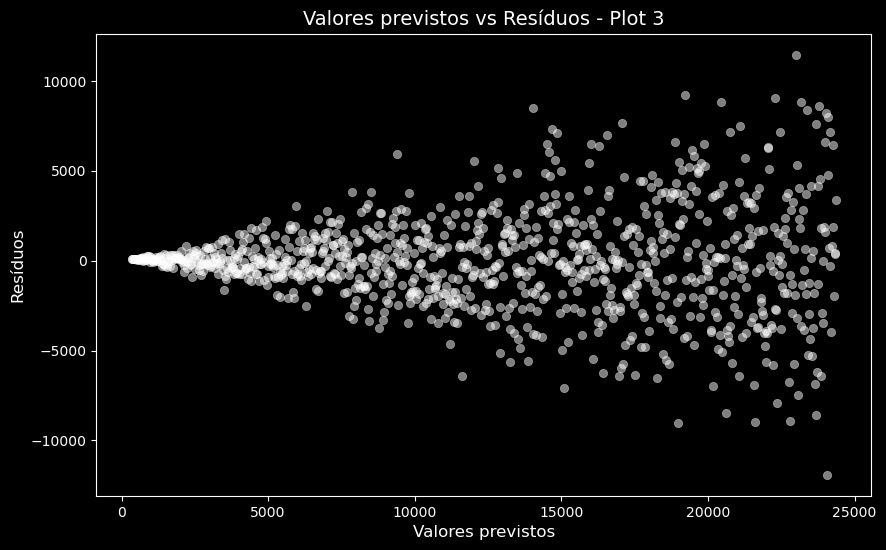

In [214]:
residuos = Y - Y_pred

# Plot dos dados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuos, color='white', alpha=0.5)
plt.title('Valores previstos vs Resíduos - Plot 3', size=14)
plt.xlabel('Valores previstos', size=12)
plt.ylabel('Resíduos', size=12)
plt.show()

Ao analisar o **Plot 3**, observamos que os resíduos aumentam à medida que os valores previstos também aumentam. Esse comportamento sugere a presença de heterocedasticidade, que é uma situação onde a variância dos resíduos não é constante ao longo dos valores preditos. Isso indica uma correlação entre os resíduos e as variáveis preditoras, sugerindo que a relação entre as variáveis preditoras (X) e a variável dependente (Y) pode não ser adequadamente capturada pelo modelo. Pode indicar omissão de variáveis preditoras no modelo.

## Diagnóstico de Heterocedasticidade

Nem sempre a heterocedasticidade é óbvia, como nos exemplos mostrados neste notebook, por isso é importante realizar um teste diagnóstico. Para isso, vamos utilizar o teste de Breusch-Pagan da biblioteca statsmodels. O objetivo desse teste é verificar se a variância dos resíduos do modelo depende dos valores das variáveis independentes. O teste envolve a realização de uma regressão auxiliar, por isso vamos adicionar uma constante *(X_constante)* ao conjunto de variáveis independentes.

Ao final teremos, através do p-value o resultado do teste.

In [219]:
# Adicionar a constante
X_constante = sm.add_constant(X)

# Realizar teste de Breusch-Pagan
test_result = sms.het_breuschpagan(residuos, X_constante)

# Resultados do teste:  p-value, f-value, and f p-value
print('Breusch-Pagan:', test_result[0])
print('p-value:', test_result[1])
print('f-value:', test_result[2])
print('f p-value:', test_result[3])

# Definição do nível se significância alpha
alpha = 0.05 

if test_result[1] > alpha:
    print('Não se rejeita H0 → HOMOCEDASTICIDADE')
else:
	print('Rejeita-se H0 → HETEROCEDASTICIDADE')


Breusch-Pagan: 188.2366549903718
p-value: 7.713302808426113e-43
f-value: 231.4223509046998
f p-value: 3.7012616965380408e-47
Rejeita-se H0 → HETEROCEDASTICIDADE
